# Assignment 1: Face Recognition System
- Bhavantik Gondaliya

## Index
- 1.HOG Method
- 2.Face Detection
- 3.Face Recognition

In [1]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2 
%matplotlib inline

## HOG Method

(194, 259, 3)


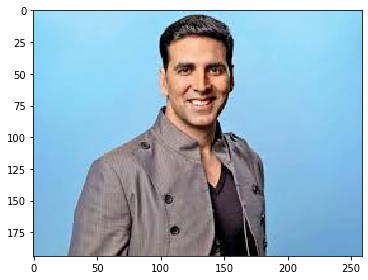

In [2]:
#reading the image
img = imread('01.jpg')
imshow(img)
print(img.shape)

(128, 128, 3)


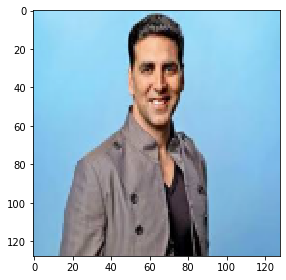

In [3]:
#resizing image 
resized_img = resize(img, (128,128)) 
imshow(resized_img) 
print(resized_img.shape)

In [4]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape

(8100,)

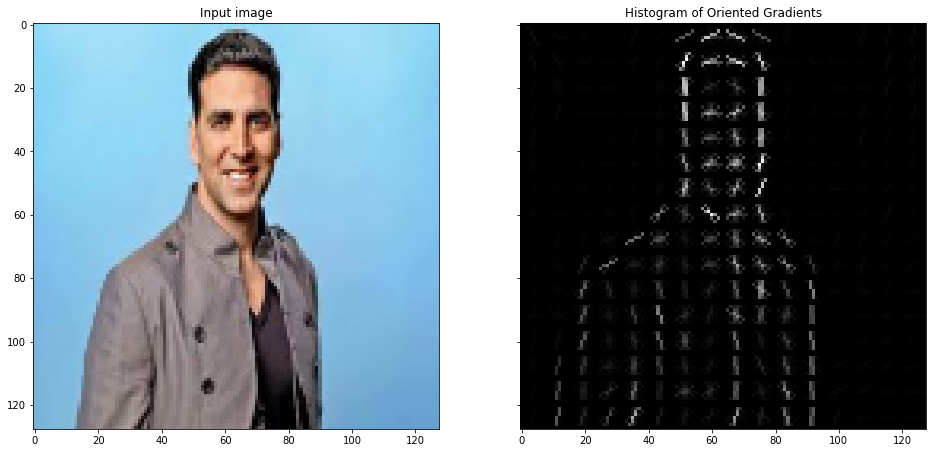

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [6]:
len(fd)

8100

## Face Detection

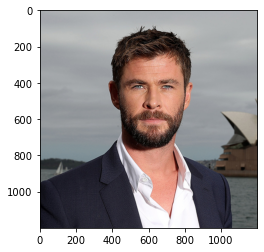

In [8]:
image = cv2.imread('02.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [9]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)

print("Found {} face(s) in input image".format(number_of_faces))


Found 1 face(s) in input image


A face is located at pixel location top:418, left: 333,Bottom: 803, Right: 718


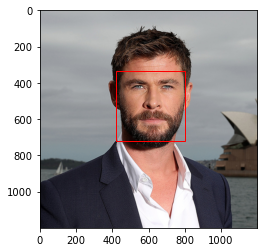

In [10]:
plt.imshow(image)
ax=plt.gca()

for face_location in face_locations:
    
    top,right,bottom,left = face_location
    x,y,w,h= left,top,right,bottom
    print("A face is located at pixel location top:{}, left: {},Bottom: {}, Right: {}".format(x,y,w,h))
    
    
    rect = Rectangle((x,y),w-x,h-y, fill=False, color='red')
    ax.add_patch(rect)
    
plt.show()

# Face Recognition


In [11]:
# Reading the Images 
image = cv2.imread('01.jpg')
akshay = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('02.jpg')
chris = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('03.jpg')
hrutik = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('04.jpg')
leonardo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('05.jpg')
robert = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
#Image Encoding
akshay_encoding=face_recognition.face_encodings(akshay)[0]
chris_encoding=face_recognition.face_encodings(chris)[0]
hrutik_encoding=face_recognition.face_encodings(hrutik)[0]
leonardo_encoding=face_recognition.face_encodings(leonardo)[0]
robert_encoding=face_recognition.face_encodings(robert)[0]

In [14]:
known_face_encodings =[akshay_encoding,chris_encoding,hrutik_encoding,leonardo_encoding,robert_encoding]

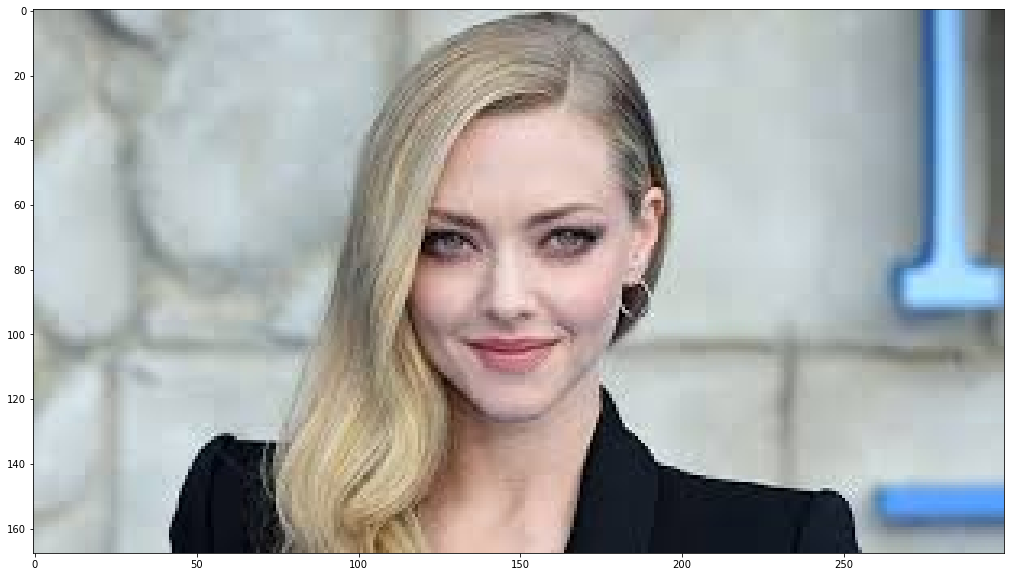

In [15]:
image =cv2.imread('e1.jpg')
unknown_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(unknown_image)

In [16]:
unknown_encoding=face_recognition.face_encodings(unknown_image)

In [17]:
def loc(unknown_image):
    face_locations = face_recognition.face_locations(unknown_image)

    number_of_faces = len(face_locations)

#print("Found {} face(s) in input image".format(number_of_faces))
    plt.imshow(unknown_image)
    ax=plt.gca()

    for face_location in face_locations:
    
        top,right,bottom,left = face_location
        x,y,w,h= left,top,right,bottom
        print("A face is located at pixel location top:{}, left: {},Bottom: {}, Right: {}".format(x,y,w,h))
    
    
        rect = Rectangle((x,y),w-x,h-y, fill=False, color='red')
        ax.add_patch(rect)
    
    
    face_landmarks_list = face_recognition.face_landmarks(unknown_image)
    import matplotlib.lines as mlines
    from matplotlib.patches import Polygon

    plt.imshow(image)
    ax = plt.gca()

    for face_landmarks in face_landmarks_list:
    
        left_eyebrow_pts = face_landmarks['left_eyebrow']
        pre_x,pre_y = left_eyebrow_pts[0]
        for (x,y) in left_eyebrow_pts[1:]:
            l = mlines.Line2D([pre_x,x], [pre_y, y], color="red")
            ax.add_line(l)
            pre_x,pre_y = x,y
        
        right_eyebrow_pts = face_landmarks['right_eyebrow']
        pre_x,pre_y = right_eyebrow_pts[0]
        for (x,y) in right_eyebrow_pts[1:]:
            l = mlines.Line2D([pre_x,x], [pre_y, y], color="red")
            ax.add_line(l)
            pre_x,pre_y = x,y
        
        p = Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
        ax.add_patch(p)
        p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
        ax.add_patch(p)
    
    plt.show()
    
    
    return plt.show()
    

Found Unknown in the photo!
A face is located at pixel location top:113, left: 47,Bottom: 187, Right: 121


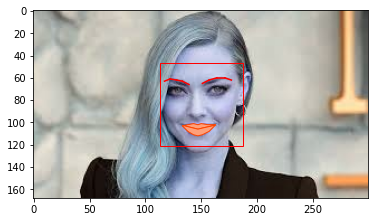

In [18]:
from scipy.spatial import distance

for k in unknown_encoding:
    results=[]
    for l in known_face_encodings:
        d = distance.euclidean(l,k)
        results.append(d)
    thresold =0.6
    results = np.array(results) <= thresold
    #print(results)
    break

c=0
for i in range(7):      
    if results[0] == True and i==0:
        c=1
        name="Akshay"
        print(f"Found {name} in the photo!")
        loc(unknown_image)
    elif results[1] == True and i==1:
        c=1
        name="Chris"
        print(f"Found {name} in the photo!")
        loc(unknown_image)
    elif results[2]== True and i==2:
        c=1
        name="Hrutik"
        print(f"Found {name} in the photo!")
        loc(unknown_image)
    elif results[3]== True and i==3:
        c=1
        name="Leonardo"
        print(f"Found {name} in the photo!")
        loc(unknown_image)
    elif results[4]== True and i==4:
        c=1
        name="Robert"
        print(f"Found {name} in the photo!")
        loc(unknown_image)

if c== 0:
    name="Unknown"
    print(f"Found {name} in the photo!")
    loc(unknown_image)